In [6]:
%%bash
strace -tt -T -r -y -o logs/mmarrays.st python src/mmarrays.py 100000

Data size = 819.200 MB
Chunk size = 0.800 MB


In [1]:
from strace_miner.views.v1 import IOMiner

In [2]:
io_calls = ['read','write','mmap','openat']
sta = IOMiner(["logs/mmarrays.st",],io_calls)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/mmarrays.csv


/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [4]:
sta.summaries[list(sta.summaries.keys())[0]]

,call,duration,percent_total,percent_sys
0,Total,2.764952,100.000000,-1.000000
1,Sys time,1.006453,36.400379,100.000000
2,IO time,0.573212,20.731354,56.953678
3,Remaining sys time,0.433241,15.669024,43.046322
4,mmap,0.029145,1.054087,2.895813
5,openat,0.098686,3.569176,9.805326
6,read,0.058147,2.103002,5.777418
7,write,0.387234,14.005089,38.475120


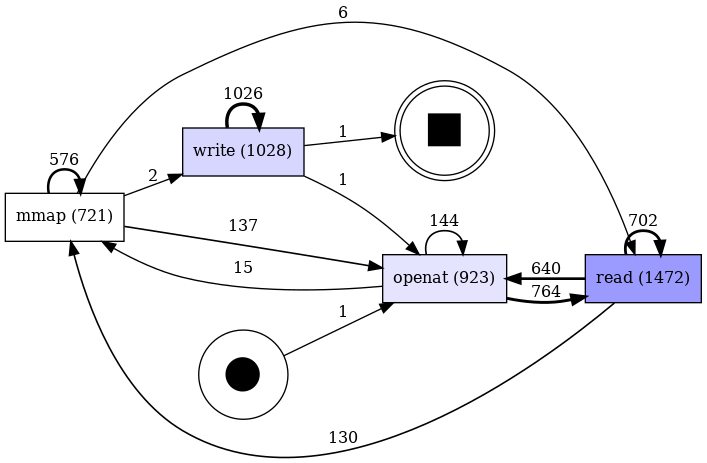

In [5]:
sta.view_dfg()